In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, f1_score, recall_score, make_scorer
import streamlit as st
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import kagglehub
from kagglehub import KaggleDatasetAdapter
from scipy.stats import chi2_contingency
import seaborn as sns
plt.style.use("fivethirtyeight")


/home/alialdin/Customer-Churn-Prediction-and-Analysis_DEPI_3/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:


file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "blastchar/telco-customer-churn",
  file_path,
)



/tmp/ipykernel_7371/4242834790.py:3: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.drop(columns = ['customerID'], inplace=True)

In [8]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [10]:
df['SeniorCitizen'].unique()

array([0, 1])

In [11]:
for col in df.columns:
    if col not in ['tenure', 'MonthlyCharges', 'TotalCharges']:
        print(col, df[col].unique())
        print("-------------------------------------")

gender ['Female' 'Male']
-------------------------------------
SeniorCitizen [0 1]
-------------------------------------
Partner ['Yes' 'No']
-------------------------------------
Dependents ['No' 'Yes']
-------------------------------------
PhoneService ['No' 'Yes']
-------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
-------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
-------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
-------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
-------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
-------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
-------------------------------------
StreamingTV ['No' 'Yes' 'No internet service']
-------------------------------------
StreamingMovies ['No' 'Yes' 'No internet service']
-------------------------------------
Contra

In [12]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(22)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

ValueError: could not convert string to float: ' '

In [16]:
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    print(col, len(df[df[col]== " "]))
    print("-------------------------------------")

tenure 0
-------------------------------------
MonthlyCharges 0
-------------------------------------
TotalCharges 11
-------------------------------------


In [17]:
df['TotalCharges'] = df['TotalCharges'].replace({" ": "0.0"}).astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

In [19]:
df['Churn'].value_counts()

Churn
No     5164
Yes    1857
Name: count, dtype: int64

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7021.0,0.162512,0.368947,0.00,0.00,0.00,0.0,1.00
tenure,7021.0,32.469449,24.534965,0.00,9.00,29.00,55.0,72.00
MonthlyCharges,7021.0,64.851894,30.069001,18.25,35.75,70.40,89.9,118.75
TotalCharges,7021.0,2286.765026,2266.855057,0.00,403.35,1400.55,3801.7,8684.80


In [21]:
print(df.columns)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [22]:
# from scipy.stats import chi2_contingency
# import pandas as pd

# # جلب الأعمدة من النوع object
# object_columns = df.select_dtypes(include="object").columns

# # لوب على الأعمدة
# for col in object_columns:
#     if col == "Churn":
#         continue  # نتخطى عمود الـ Target

#     try:
#         contingency = pd.crosstab(df['Churn'], df[col])
#         chi2, p, dof, ex = chi2_contingency(contingency)
#         print(f"{col}: p-value = {p}")
#     except Exception as e:
#         print(f"Error with column {col}: {e}")


In [23]:
# print(df['Churn'].unique())


In [24]:
# df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [25]:
# from scipy.stats import ttest_ind
# import pandas as pd

# # اختيار الأعمدة الرقمية
# numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns

# # نزيل عمود الـ Churn من القائمة
# numeric_columns = [col for col in numeric_columns if col.lower() != "churn"]

# # فصل المجموعتين
# churned = df[df["Churn"] == 1]
# not_churned = df[df["Churn"] == 0]

# # t-test على كل عمود رقمي
# for col in numeric_columns:
#     try:
#         t_stat, p_value = ttest_ind(churned[col], not_churned[col], equal_var=False)
#         print(f"{col}: p-value = {p_value}")
#     except Exception as e:
#         print(f"Error testing column {col}: {e}")


In [26]:
# df = df.drop(columns=["gender", "PhoneService"])


# Data Visualization 

In [27]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    annotations=[dict(text='Gender', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.81, y=0.5, font_size=20, showarrow=False)])
fig.show()

26.6 % of customers switched to another firm.

Customers are 49.5 % female and 50.5 % male.

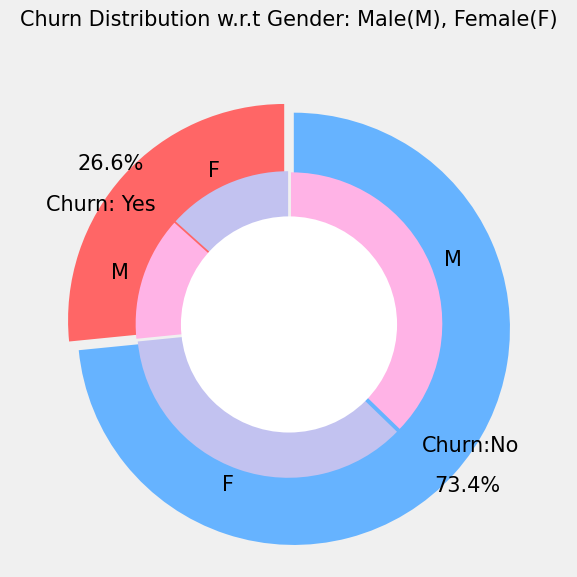

In [28]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}

plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )

centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

 
plt.axis('equal')
plt.tight_layout()
plt.show()

The analysis shows that gender has no significant impact on customers’ decision to change their service provider. Both males and females exhibit similar churn behavior.

In [29]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract

In [30]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()



In [31]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


Major customers who moved out were having Electronic Check as Payment Method.
Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

In [32]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [33]:
df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       993
Fiber optic      No       910
No               No       715
Fiber optic      Yes      631
DSL              Yes      238
No               Yes       54
Name: count, dtype: int64

In [34]:
df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       969
Fiber optic      No       889
No               No       688
Fiber optic      Yes      660
DSL              Yes      219
No               Yes       55
Name: count, dtype: int64

In [35]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.
Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

In [36]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers without dependents are more likely to churn

In [37]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers that doesn't have partners are more likely to churn

In [38]:
fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


Customers with no TechSupport are most likely to migrate to another service provider.

In [39]:
# import os
# import pandas as pd

# milestone1_folder = "milestone1"

# milestone2_folder = os.path.join(os.path.dirname(milestone1_folder), "milestone2")

# if not os.path.exists(milestone2_folder):
#     os.makedirs(milestone2_folder)

# output_path = os.path.join(milestone2_folder, "milestone2_dataset.csv")
# df.to_csv(output_path, index=False)

# print(f"Dataset has been saved to {output_path}")


In [40]:
df.shape



(7021, 20)

In [41]:
df.duplicated().sum()

np.int64(0)

In [42]:

object_columns = df.select_dtypes(include="object").columns

for col in object_columns:
    if col == "Churn":
        continue

    try:
        contingency = pd.crosstab(df['Churn'], df[col])
        chi2, p, dof, ex = chi2_contingency(contingency)
        print(f"{col}: p-value = {p}")
    except Exception as e:
        print(f"Error with column {col}: {e}")


gender: p-value = 0.4794615390898278
Partner: p-value = 1.0999615978939857e-35
Dependents: p-value = 1.5995676694071902e-42
PhoneService: p-value = 0.3664940064978196
MultipleLines: p-value = 0.002068559953130916
InternetService: p-value = 1.0857790034735195e-159
OnlineSecurity: p-value = 1.3292265237878154e-184
OnlineBackup: p-value = 8.614898409283198e-131
DeviceProtection: p-value = 1.9555513236078665e-121
TechSupport: p-value = 7.14685771582873e-180
StreamingTV: p-value = 5.469454144000476e-82
StreamingMovies: p-value = 2.750289622934001e-82
Contract: p-value = 6.442284610020534e-257
PaperlessBilling: p-value = 2.1518977990247168e-57
PaymentMethod: p-value = 3.0267752570875056e-139


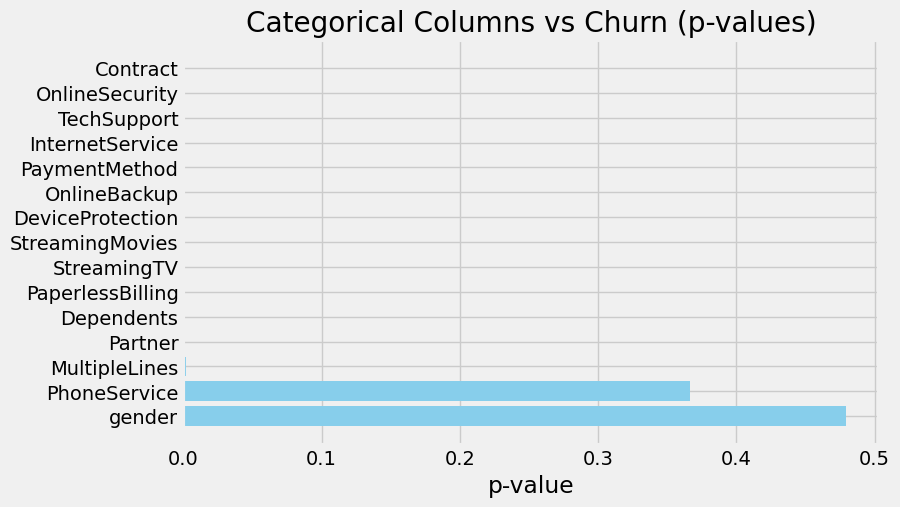

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency

p_values = []

object_columns = df.select_dtypes(include="object").columns

for col in object_columns:
    if col == "Churn":
        continue

    try:
        contingency = pd.crosstab(df['Churn'], df[col])
        chi2, p, dof, ex = chi2_contingency(contingency)
        p_values.append((col, p))
    except Exception as e:
        print(f"Error with column {col}: {e}")

p_df = pd.DataFrame(p_values, columns=['Column', 'p_value'])

p_df = p_df.sort_values('p_value')

plt.figure(figsize=(8,5))
plt.barh(p_df['Column'], p_df['p_value'], color='skyblue')
plt.xlabel('p-value')
plt.title('Categorical Columns vs Churn (p-values)')
plt.gca().invert_yaxis() 
plt.show()


After performing the Chi-Square test on categorical variables, we observed that gender (p-value = 0.479) and PhoneService (p-value = 0.366) have high p-values, indicating they are not significantly associated with customer churn. Therefore, we decided to drop these two columns from the dataset as they are unlikely to contribute to model performance.

In [44]:
df['is_long_term'] = (df['tenure'] > 12).astype(int)

In [45]:
from scipy.stats import chi2_contingency
import pandas as pd

contingency_table = pd.crosstab(df['is_long_term'], df['Churn'])

chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square p-value for is_long_term:", p)

if p < 0.05:
    print("is_long_term is significantly associated with Churn ✅")
else:
    print("is_long_term is NOT significantly associated with Churn ❌")


Chi-Square p-value for is_long_term: 1.1165310005866383e-154
is_long_term is significantly associated with Churn ✅


In [46]:
import os
import pandas as pd

notebook_dir = os.path.dirname(os.getcwd())  

project_root = os.path.dirname(notebook_dir)

data_folder = os.path.join(project_root, "Data")

os.makedirs(data_folder, exist_ok=True)

output_path = os.path.join(data_folder, "DataAfterPrepared_WithoutDropColumns.csv")

df.to_csv(output_path, index=False)

print(f"Dataset saved to: {output_path}")

Dataset saved to: /home/alialdin/Customer-Churn-Prediction-and-Analysis_DEPI_3/Data/DataAfterPrepared_WithoutDropColumns.csv


In [47]:
df.drop(columns=['gender'], inplace=True)
df.drop(columns=['PhoneService'], inplace=True)


In [48]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,is_long_term
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0


In [49]:
import os
import pandas as pd

notebook_dir = os.path.dirname(os.getcwd())  

project_root = os.path.dirname(notebook_dir)

data_folder = os.path.join(project_root, "Data")

os.makedirs(data_folder, exist_ok=True)

output_path = os.path.join(data_folder, "DataAfterPrepared.csv")

df.to_csv(output_path, index=False)

print(f"Dataset saved to: {output_path}")


Dataset saved to: /home/alialdin/Customer-Churn-Prediction-and-Analysis_DEPI_3/Data/DataAfterPrepared.csv
